In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# The Data
[Read about the data here](https://www.kaggle.com/lava18/google-play-store-apps)

In [2]:
google_play_df = pd.read_csv("data/google-play-store-apps/googleplaystore.csv")
google_play_df.head()

#family_category.isna().sum()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
google_play_reviews_df = pd.read_csv("data/google-play-store-apps/googleplaystore_user_reviews.csv")
google_play_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [4]:
print(google_play_df.shape)
google_play_df.head()

google_play_df['App'].value_counts()

(10841, 13)


ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Duolingo: Learn Languages Free                       7
ESPN                                                 7
8 Ball Pool                                          7
                                                    ..
CB Pay                                               1
The real aquarium - HD                               1
Miss FQ                                              1
MediaFire                                            1
Solitaire: Decked Out Ad Free                        1
Name: App, Length: 9660, dtype: int64

In [5]:
google_play_df.isna().sum()
google_play_df['Android Ver'].loc[google_play_df['Android Ver'].isna()]
google_play_df['Android Ver'].value_counts()
#google_play_df['Rating'].value_counts()



4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 8.0                2
7.0 - 7.1.1              1
2.2 - 7.1.1              1
5.0 - 6.0                1
5.0 - 7.1.1              1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

# Question 1: 
Which category, in your opinion, has the best ratings? How are you measuring best ratings?


Use the `googleplaystore.csv`

In [6]:
q1_df = google_play_df.loc[:, ['Category','App', 'Rating','Reviews',]] #Created new data frame with only desired columns
q1_df.head()
q1_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

This series has a data type of int64 and has 1 weird value. In the next cell we will remove the 1.9 category from this data as it is miniscule and does not give us any information.

In [7]:
q1_df = q1_df.drop(q1_df[q1_df['Category'] == '1.9'].index) #First this looks for the category with the name '1.9' then it returns that index to be dropped from the dataframe

q1_df['Reviews'] = q1_df['Reviews'].astype(int) #dtype is object needs to be integer

q1_df = q1_df[(q1_df.Reviews > 100)]

q1_df['Category'].value_counts() #check to see if it has been removed and it has

FAMILY                 1327
GAME                   1016
TOOLS                   536
SPORTS                  284
PRODUCTIVITY            281
PHOTOGRAPHY             278
COMMUNICATION           272
HEALTH_AND_FITNESS      254
FINANCE                 245
PERSONALIZATION         228
LIFESTYLE               217
SOCIAL                  217
SHOPPING                214
NEWS_AND_MAGAZINES      185
BUSINESS                184
MEDICAL                 181
TRAVEL_AND_LOCAL        181
DATING                  154
EDUCATION               153
ENTERTAINMENT           149
BOOKS_AND_REFERENCE     131
VIDEO_PLAYERS           131
FOOD_AND_DRINK           98
MAPS_AND_NAVIGATION      94
HOUSE_AND_HOME           75
WEATHER                  72
AUTO_AND_VEHICLES        55
ART_AND_DESIGN           53
COMICS                   52
LIBRARIES_AND_DEMO       47
PARENTING                41
BEAUTY                   32
EVENTS                   26
Name: Category, dtype: int64

In [8]:
q1_df['Reviews'].unique() #dtype is object needs to be integer

array([   159,    967,  87510, ...,    603,   1195, 398307], dtype=int64)

In [9]:
q1_df.groupby('Category').Reviews.sum() #All categorie have more than enough reviews (already filtered out reviews < 100) 
display(q1_df.groupby('Category').Rating.mean())# Mean of all ratings in each category
high_mean = round(max(q1_df.groupby('Category').Rating.mean()),3) #what has the highest rated mean
#print(f'The EVENTS category with the highest average rating = {high_mean}')
#q1_df.groupby('Category').Rating.mean().plot(kind='bar', figsize = (15,15))


Category
ART_AND_DESIGN         4.360377
AUTO_AND_VEHICLES      4.312727
BEAUTY                 4.348276
BOOKS_AND_REFERENCE    4.410078
BUSINESS               4.181522
COMICS                 4.135294
COMMUNICATION          4.197048
DATING                 3.994118
EDUCATION              4.386842
ENTERTAINMENT          4.126174
EVENTS                 4.340000
FAMILY                 4.182024
FINANCE                4.180816
FOOD_AND_DRINK         4.208163
GAME                   4.295468
HEALTH_AND_FITNESS     4.329134
HOUSE_AND_HOME         4.213699
LIBRARIES_AND_DEMO     4.152381
LIFESTYLE              4.045370
MAPS_AND_NAVIGATION    4.139362
MEDICAL                4.243094
NEWS_AND_MAGAZINES     4.114286
PARENTING              4.315789
PERSONALIZATION        4.318860
PHOTOGRAPHY            4.228777
PRODUCTIVITY           4.268214
SHOPPING               4.267757
SOCIAL                 4.286175
SPORTS                 4.253004
TOOLS                  4.116667
TRAVEL_AND_LOCAL       4.149724

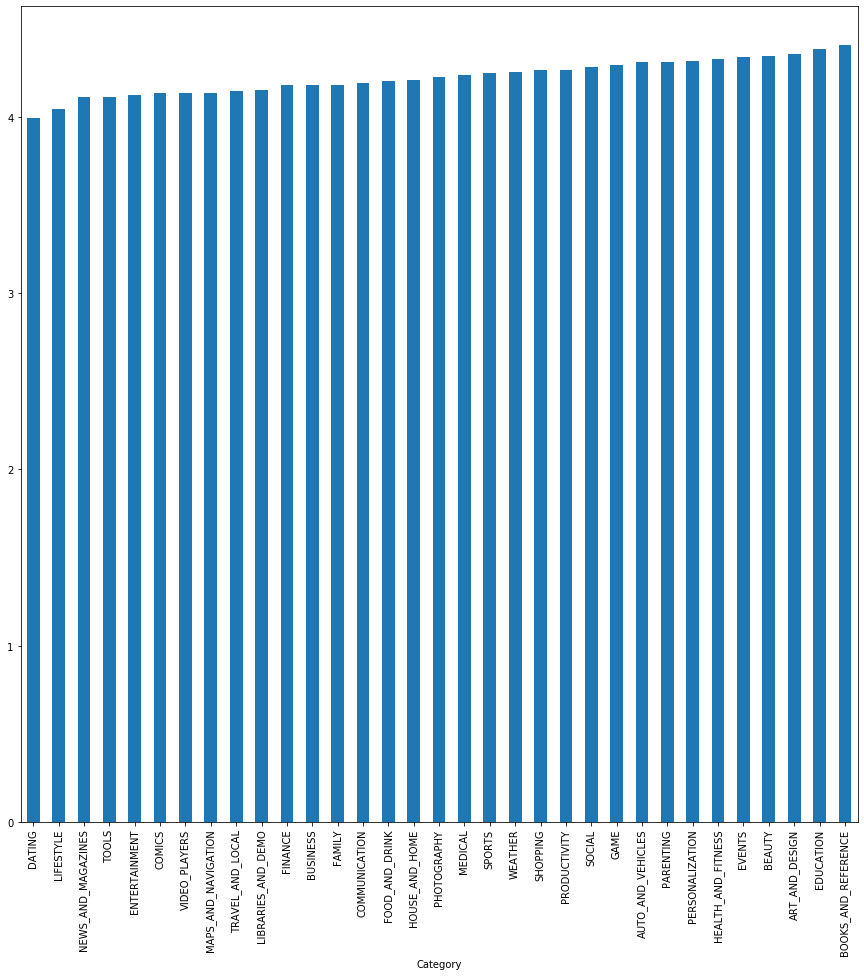

In [10]:
q1_df.groupby('Category').Rating.mean().sort_values().plot(kind='bar', figsize = (15,15))

# Question 2:
Is there a relationship between ratings and size? How did you measure the relationship? Why did you choose this measurement? 

Please create a scatterplot of size vs ratings to demonstrate the relationship or lack thereof. 

C:\Users\blake\.conda\envs\learn-env\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0, 0.5, 'Rating')

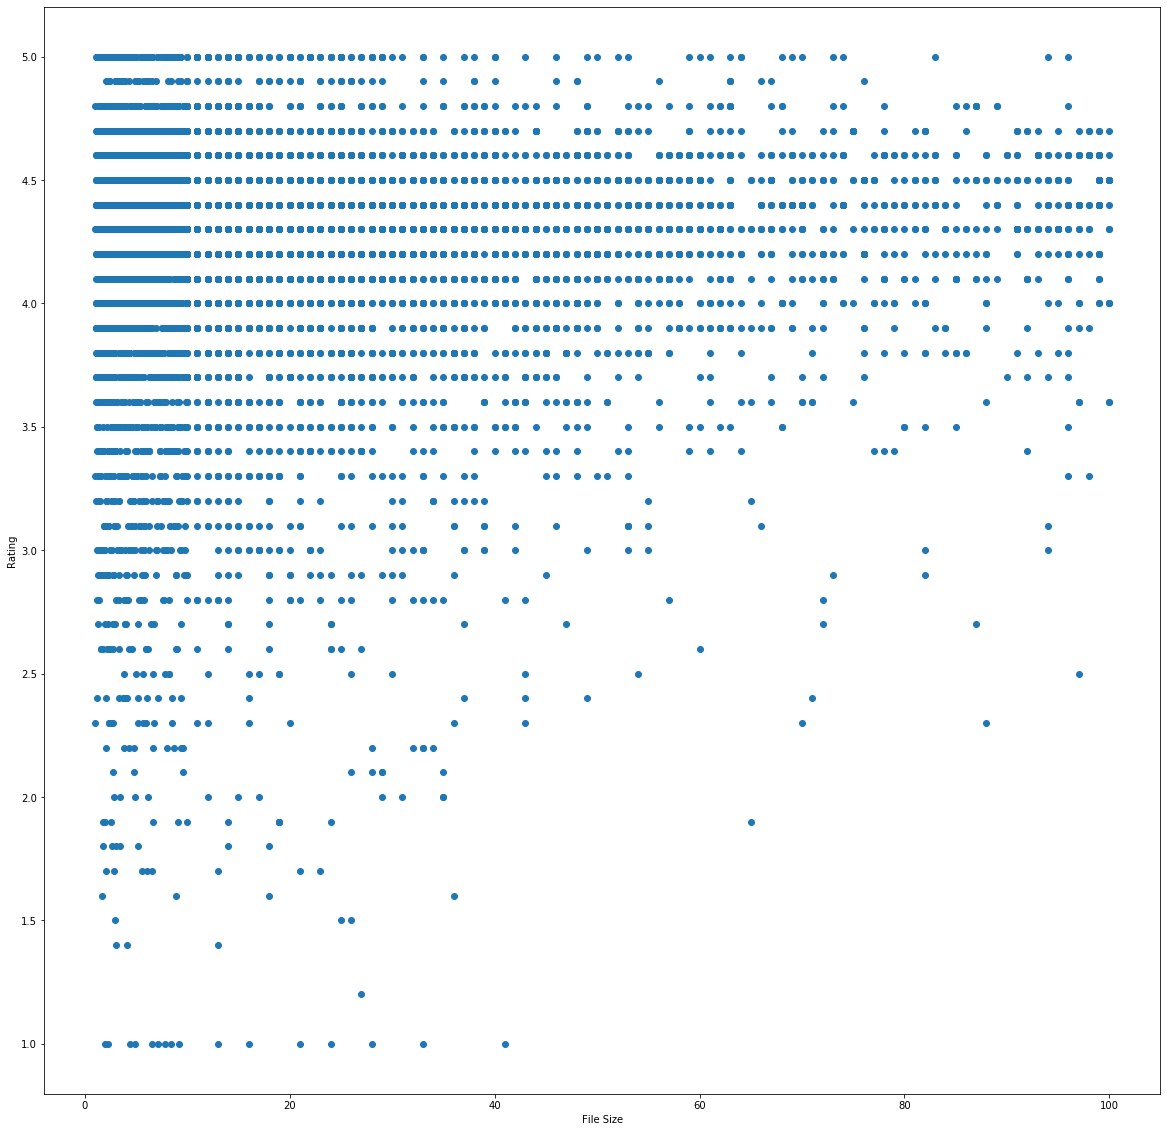

In [12]:
ratings_size_df = google_play_df.loc[:, ['Rating','Size']]
trash_data = ratings_size_df[ratings_size_df['Size'] == "Varies with device"]
ratings_size_df.drop(trash_data.index, inplace=True)
ratings_size_df['Size'] = ratings_size_df['Size'].astype(str)
ratings_size_df['Rating'] = ratings_size_df['Rating'].astype(float)

megabyte_df = ratings_size_df.loc[ratings_size_df.Size.str.contains('M')] #8829
megabyte_df.Size = megabyte_df.Size.str.strip('M')
megabyte_df.Size = megabyte_df.Size.astype(float)
cor_coef = megabyte_df.Size.corr(megabyte_df.Rating) #0.076

plt.figure(figsize = (20,20))
plt.scatter(megabyte_df.Size, megabyte_df.Rating)
plt.xlabel('File Size')
plt.ylabel('Rating')


# For this next section, choose a Category of playstore apps

## Category Chosen: [insert here]



# Question 3:
For your category, how many genres are represented? What are their counts? Please show this with a bar chart. 

In [14]:
select_family = google_play_df.loc[google_play_df['Category'] == 'FAMILY']
print(select_family)

                                    App Category  Rating  Reviews  \
2014                       YouTube Kids   FAMILY     4.5   470694   
2015                         Candy Bomb   FAMILY     4.4    42145   
2016                             ROBLOX   FAMILY     4.5  4449910   
2017       Jewels Crush- Match 3 Puzzle   FAMILY     4.4    14774   
2018                   Coloring & Learn   FAMILY     4.4    12753   
...                                 ...      ...     ...      ...   
10821                           Poop FR   FAMILY     NaN        6   
10827                Fr Agnel Ambarnath   FAMILY     4.2      117   
10834                     FR Calculator   FAMILY     4.0        7   
10836                  Sya9a Maroc - FR   FAMILY     4.5       38   
10837  Fr. Mike Schmitz Audio Teachings   FAMILY     5.0        4   

                     Size      Installs  Type Price Content Rating  \
2014   Varies with device   50,000,000+  Free     0       Everyone   
2015                  20M   10,

# Question 4:
What is something interesting you found about your category? 

In [16]:
select_family = google_play_df[google_play_df['Category'] == 'FAMILY'].max()
print(select_family)

App                                  英漢字典 EC Dictionary
Category                                         FAMILY
Rating                                                5
Reviews                                             997
Size                                 Varies with device
Installs                                   500,000,000+
Price                                                 0
Content Rating                                  Unrated
Genres            Video Players & Editors;Music & Video
Last Updated                          September 9, 2017
Android Ver                          Varies with device
dtype: object


# Question 5:
What is something interesting you found about your category in relationship to the rest of the data? 

Text(0.5, 1.0, 'Count of apps in each category')

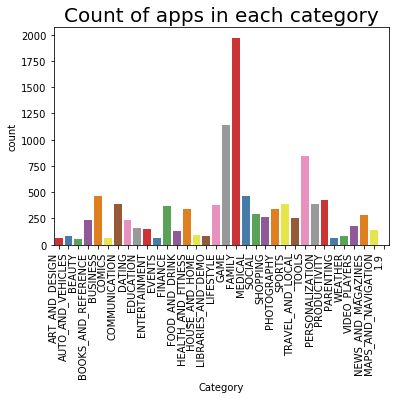

In [19]:
import seaborn as sns

df = google_play_df


g = sns.countplot(x="Category",data=df, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of apps in each category',size = 20)


# Question 6:
Anything else we should know about this dataset?

ValueError: 'explode' must be of length 'x'

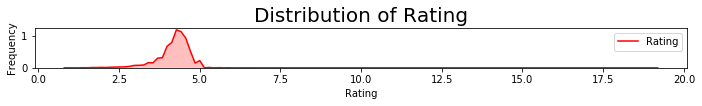

In [39]:
from pylab import rcParams

rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(df.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)


#ii) Percentage of Free Apps in store

labels =df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)


colors = ["palegreen","yellow"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free App in store',size = 20)
plt.show()
